In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/youtube.csv')

<ipython-input-25-6bca16ac4cb8>:2: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/youtube.csv')


In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return tokens
    else:
        return []

df['title_tokens'] = df['title'].apply(preprocess_text)
df['tags_tokens'] = df['tags'].apply(preprocess_text)

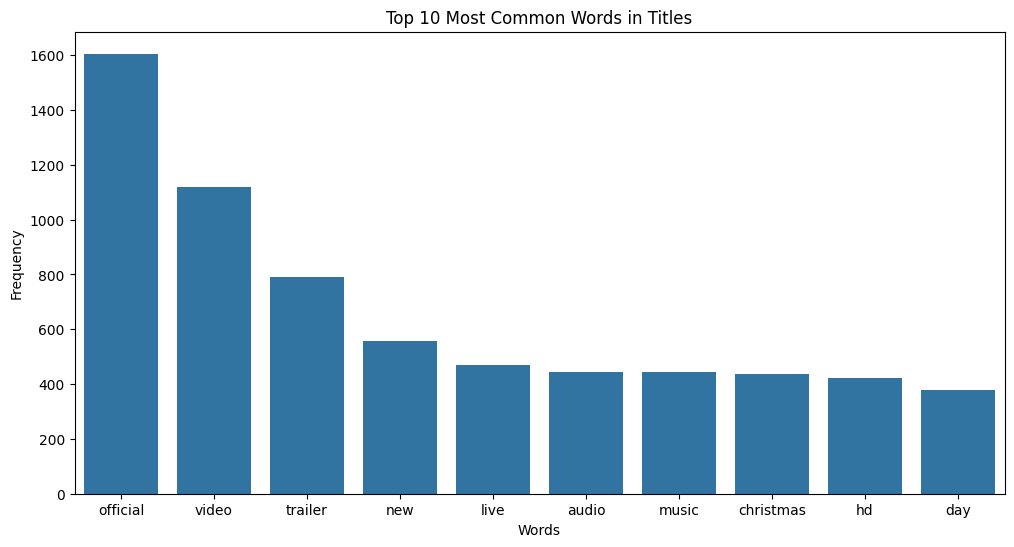

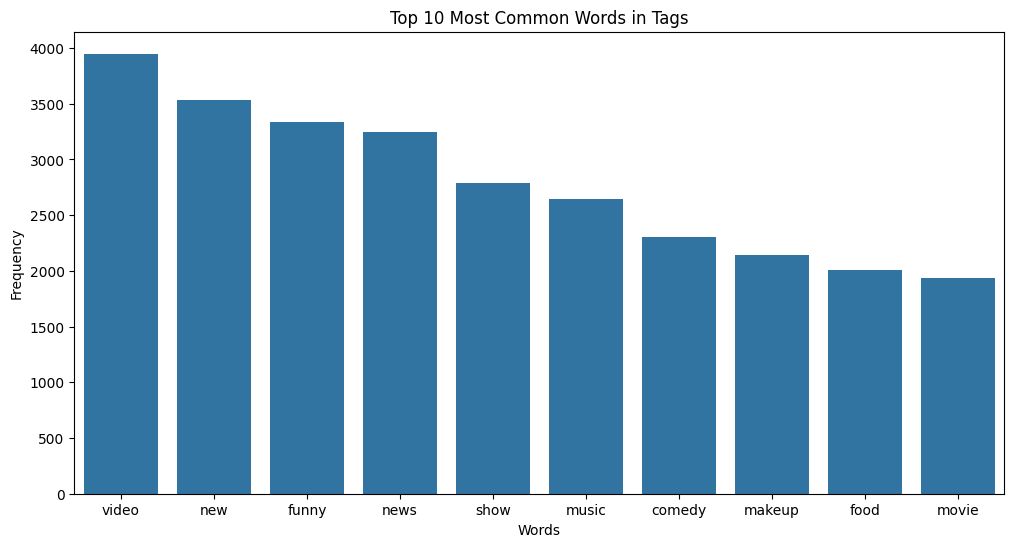

In [29]:
# Flatten the lists of tokens
all_title_tokens = [token for sublist in df['title_tokens'] for token in sublist]
all_tags_tokens = [token for sublist in df['tags_tokens'] for token in sublist]

# Get the most common words in titles and tags
top_title_words = Counter(all_title_tokens).most_common(10)
top_tags_words = Counter(all_tags_tokens).most_common(10)

# Plot the most common words in titles
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_title_words], y=[word[1] for word in top_title_words])
plt.title('Top 10 Most Common Words in Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Plot the most common words in tags
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_tags_words], y=[word[1] for word in top_tags_words])
plt.title('Top 10 Most Common Words in Tags')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [15]:
import seaborn as sns

#Channel Analysis: Top Channels by views
top_channels_views = df.groupby('channel_title')['views'].sum().sort_values(ascending = False).head(10)

# Channel Analysis: Top Channels by Likes
top_channels_likes = df.groupby('channel_title')['likes'].sum().sort_values(ascending=False).head(10)

# Channel Analysis: Top Channels by Comments
top_channels_comments = df.groupby('channel_title')['comment_count'].sum().sort_values(ascending=False).head(10)

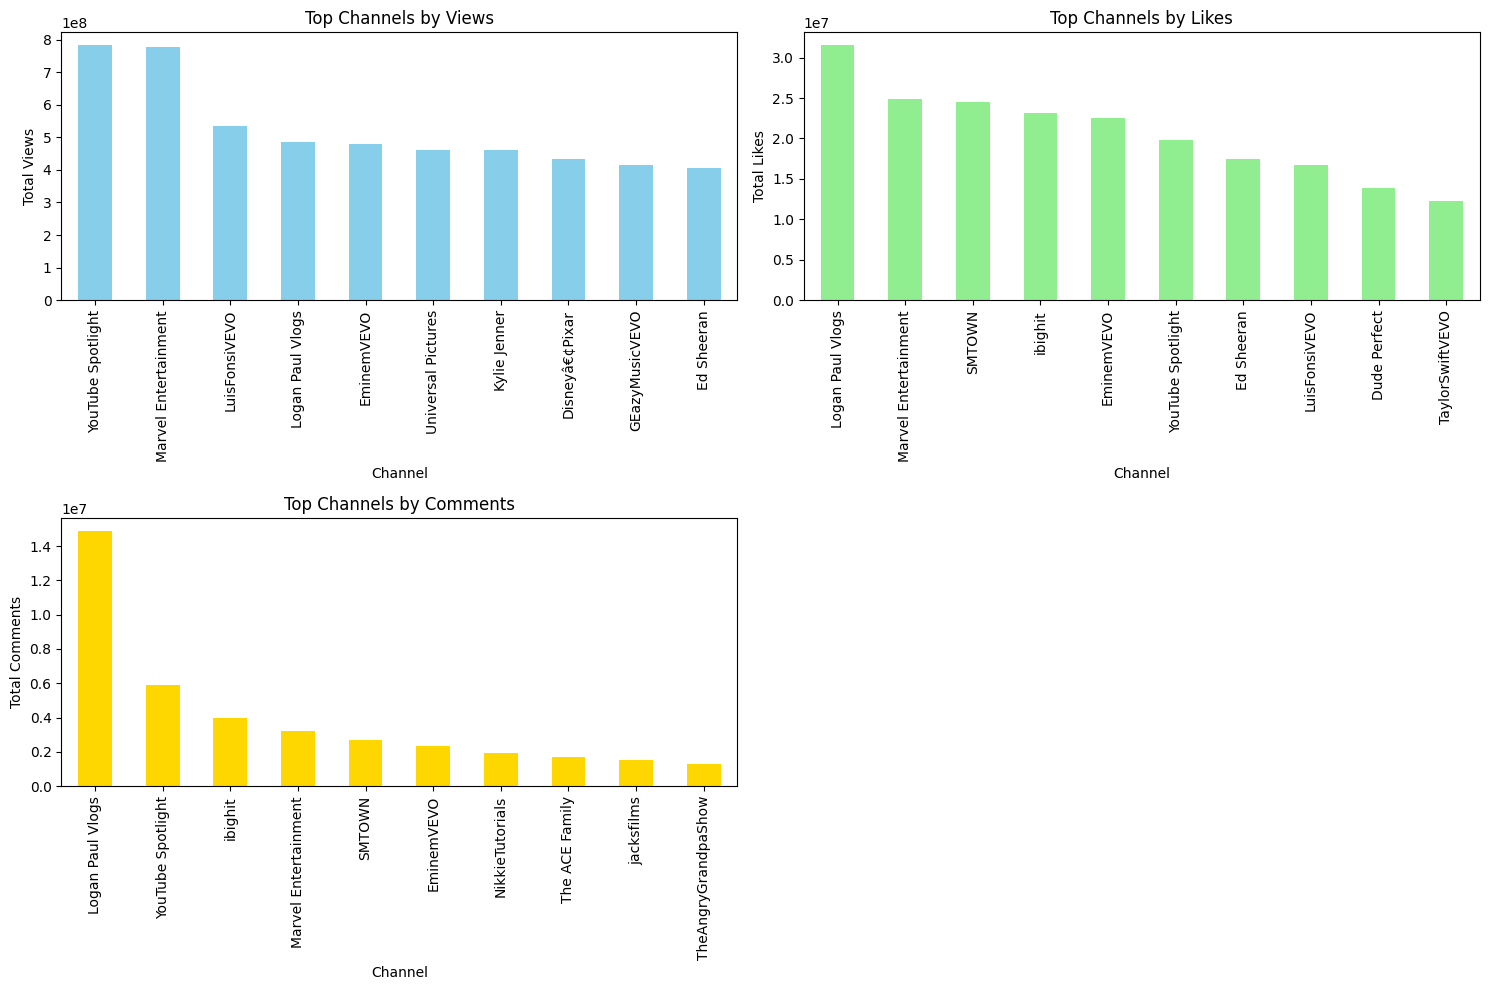

In [16]:
#Plotting
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
top_channels_views.plot(kind = 'bar', color = 'skyblue')
plt.title('Top Channels by Views')
plt.xlabel('Channel')
plt.ylabel('Total Views')

# Top Channels by Likes
plt.subplot(2, 2, 2)
top_channels_likes.plot(kind='bar', color='lightgreen')
plt.title('Top Channels by Likes')
plt.xlabel('Channel')
plt.ylabel('Total Likes')

# Top Channels by Comments
plt.subplot(2, 2, 3)
top_channels_comments.plot(kind='bar', color='gold')
plt.title('Top Channels by Comments')
plt.xlabel('Channel')
plt.ylabel('Total Comments')

plt.tight_layout()
plt.show()